# Linear Regression

In statistics, linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).

Linear regression is perhaps one of the most well known and well understood algorithms in statistics and machine learning.

There are two types of linear regression- Simple and Multiple.

## Simple Linear Regression


Simple linear regression is useful for finding relationship between two continuous variables. One is predictor or independent variable and other is response or dependent variable. It looks for statistical relationship but not deterministic relationship. Relationship between two variables is said to be deterministic if one variable can be accurately expressed by the other.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

How many samples do you have ? 2
Enter the input value of sample 1 : 1
Enter the expected output value of sample 1 : 1
Enter the input value of sample 2 : 2
Enter the expected output value of sample 2 : 2


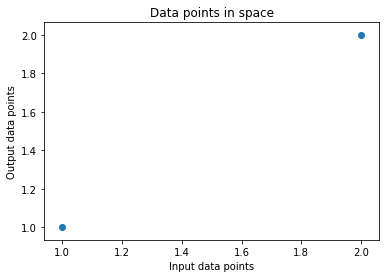

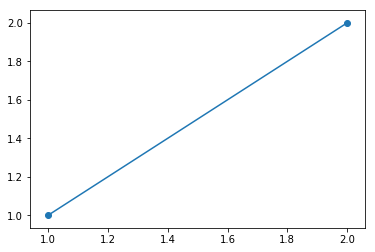

Your line has a slope of : 1.0
Your line has an intercept of : 0.0
The equation of your line is : y = 1.0x + 0.0

The value of R2 or the PCC squared for your data is 1.0

Note that R2 is not always a good measure of your models performance.
R-squared cannot determine whether the coefficient estimates and                predictions are biased, which is why you must assess the residual plots.
You have a perfect model :) ...Ensure that it is not overfitting though.

The adjusted R-squared is a modified version of R-squared that has been adjusted for       the number of predictors in the model. The adjusted R-squared increases only if       the new term improves the model more than would be expected by chance.      It decreases when a predictor improves the model by less than expected by chance.
The value of adjusted R2 is : nan


C:\Users\PERSONAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in double_scalars


In [2]:
num_samples = int(input("How many samples do you have ? "))
X = np.empty((num_samples,))
y = np.empty((num_samples,))

for i in range(num_samples):
    X[i] = int(input('Enter the input value of sample {} : '.format(i+1)))
    y[i] = int(input('Enter the expected output value of sample {} : '.format(i+1)))
    
plt.scatter(X,y)
plt.xlabel('Input data points')
plt.ylabel('Output data points')
plt.title('Data points in space')
plt.show()

denominator = X.dot(X) - X.mean()*X.sum()
m = (X.dot(y) - y.mean()*(X.sum()))/denominator
c = (y.mean()*X.dot(X) - X.mean()*X.dot(y))/denominator
     
yhat = m*X + c
plt.scatter(X,y)
plt.plot(X,yhat)
plt.show()

print("Your line has a slope of : {}".format(m))
print("Your line has an intercept of : {}".format(c))
print('The equation of your line is : y = {}x + {}'.format(m,c))
print()

d1 = y - yhat
d2 = y - y.mean()
R2 = 1 - (d1.dot(d1)/d2.dot(d2))

print('The value of R2 or the PCC squared for your data is {}'.format(R2))
print()
print("Note that R2 is not always a good measure of your models performance.")
print("R-squared cannot determine whether the coefficient estimates and          \
      predictions are biased, which is why you must assess the residual plots.")
if R2 == 1:
    print('You have a perfect model :) ...Ensure that it is not overfitting though.')
elif R2 > 0.70:
    print("That is a very good fit ")
elif R2 > 0.40 and R2<.70:
    print("Your model is decent." )
elif R2>0 and R2<0.4:
    print("Your model has poor performance" )
elif R2<0:
    print("Your model is very poor.")

    print("Even the wildest of guesses are statistically would be more significant.\
          Here is what you could do:\n \
      1.Try a different model altogether. \n \
      2.Try using better features. \n  \
      3.Try using polynomial Linear Regression ")

SS_Residual = sum((y-yhat)**2)
SS_Total = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-1-1)

print()
print("The adjusted R-squared is a modified version of R-squared that has been adjusted for \
      the number of predictors in the model. The adjusted R-squared increases only if \
      the new term improves the model more than would be expected by chance.\
      It decreases when a predictor improves the model by less than expected by chance.")
print("The value of adjusted R2 is : {}".format(adjusted_r_squared))

# Multiple Linear Regression

Multiple linear regression (MLR) is used to determine a mathematical relationship among a number of random variables. In other terms, MLR examines how multiple independent variables are related to one dependent variable.

## Closed Form Solution

This approach uses a non gradient descent approach and is acheved by simply differentiating the error function w.r.t the weight matrix W.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

How many samples do you have ? 2
How many features do you wish to consider ? :2
Enter the input values and expected output values in space seperated tuples.(3,4,8) (3,3,9)


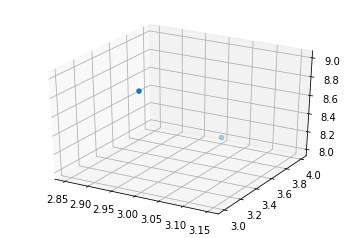

The value of R2 or the PCC squared for your data is 1.0

Note that R2 is not always a good measure of your models performance.
R-squared cannot determine whether the coefficient estimates andpredictions are biased, which is why you must assess the residual plots.


You have a perfect model :) ...Ensure that it is not overfitting though.

The adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases only if the new term improves the model more than would be expected by chance.It decreases when a predictor improves the model by less than expected by chance.

The value of adjusted R2 is : 1.0


In [4]:
global var
var = False

num_samples = int(input("How many samples do you have ? "))
Dim = int(input("How many features do you wish to consider ? :"))

Data = input("Enter the input values and expected output values in space seperated tuples.")
Data = [eval(i) for i in Data.split(' ')]

if len(Data) != num_samples:
    print("You have provided incorrect number of samples")
X = np.array([list(i[0:Dim]) for i in Data])
y = np.array([i[-1] for i in Data])

if Dim == 2:
    fig = plt.figure()
    ax = fig.add_subplot(111,projection = '3d')
    ax.scatter(X[:,0],X[:,1],y)
    plt.show()
elif Dim == 1:
    plt.scatter(X,y)
    plt.xlabel('Input data points')
    plt.ylabel('Output data points')
    plt.title('Data points in space')
    plt.show()
else:
    print("The visualization is beyond human perception")
try:
    W = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,y))
    yhat = X.dot(W)
except np.linalg.LinAlgError:
    var = True
    print("The matrix in singular, You were caught by the dummy\
variable trap, use gradient descent instead")
    
if not var:
    W = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,y))
    yhat = X.dot(W)
    d1 = y - yhat
    d2 = y - y.mean()
    R2 = 1 - (d1.dot(d1)/d2.dot(d2))

    print('The value of R2 or the PCC squared for your data is {}'.format(R2))
    print()
    print("Note that R2 is not always a good measure of your models performance.")
    print("R-squared cannot determine whether the coefficient estimates and\
predictions are biased, which is why you must assess the residual plots.")
    print()
    print()
    if R2 == 1:
        print('You have a perfect model :) ...Ensure that it is not overfitting though.')
    elif R2 > 0.70:
        print("That is a very good fit ")
    elif R2 > 0.40 and R2<.70:
        print("Your model is decent." )
    elif R2>0 and R2<0.4:
        print("Your model has poor performance" )
    elif R2<0:
        print("Your model is very poor.")
        print("Even the wildest of guesses are statistically would be more significant.\
Here is what you could do:\n \
1.Try a different model altogether. \n \
2.Try using better features. \n  \
3.Try using polynomial Linear Regression ")

    SS_Residual = sum((y-yhat)**2)
    SS_Total = sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)

    print()
    print("The adjusted R-squared is a modified version of R-squared that has been adjusted for \
the number of predictors in the model. The adjusted R-squared increases only if \
the new term improves the model more than would be expected by chance.\
It decreases when a predictor improves the model by less than expected by chance.")
    print()
    print("The value of adjusted R2 is : {}".format(adjusted_r_squared))

## L2 / Ridge Regression 

How many samples do you have ? 2
How many features do you wish to consider ? :2
Enter the input values and expected output values in space seperated tuples.(3,4,9) (4,4,5)
Enter a value for the L2 regularization parameter Lambda0


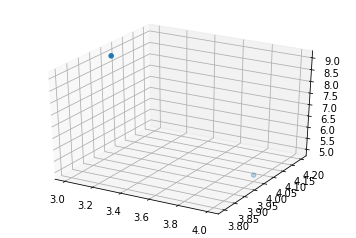

The value of R2 or the PCC squared for your data is 1.0

Note that R2 is not always a good measure of your models performance.
R-squared cannot determine whether the coefficient estimates andpredictions are biased, which is why you must assess the residual plots.


You have a perfect model :) ...Ensure that it is not overfitting though.

The adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases only if the new term improves the model more than would be expected by chance.It decreases when a predictor improves the model by less than expected by chance.

The value of adjusted R2 is : 1.0


In [9]:
global var
var = False

num_samples = int(input("How many samples do you have ? "))
Dim = int(input("How many features do you wish to consider ? :"))

Data = input("Enter the input values and expected output values in space seperated tuples.")
Data = [eval(i) for i in Data.split(' ')]

lamda = int(input("Enter a value for the L2 regularization parameter Lambda"))

if len(Data) != num_samples:
    print("You have provided incorrect number of samples")
X = np.array([list(i[0:Dim]) for i in Data])
y = np.array([i[-1] for i in Data])

if Dim == 2:
    fig = plt.figure()
    ax = fig.add_subplot(111,projection = '3d')
    ax.scatter(X[:,0],X[:,1],y)
    plt.show()
elif Dim == 1:
    plt.scatter(X,y)
    plt.xlabel('Input data points')
    plt.ylabel('Output data points')
    plt.title('Data points in space')
    plt.show()
else:
    print("The visualization is beyond human perception")
try:
    W = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,y))
    yhat = X.dot(W)
except np.linalg.LinAlgError:
    var = True
    print("The matrix in singular, You were caught by the dummy\
variable trap, use gradient descent instead")
    
if not var:
    W = np.linalg.solve(lamda*np.eye(Dim) + np.dot(X.T,X),np.dot(X.T,y))
    yhat = X.dot(W)
    d1 = y - yhat
    d2 = y - y.mean()
    R2 = 1 - (d1.dot(d1)/d2.dot(d2))

    print('The value of R2 or the PCC squared for your data is {}'.format(R2))
    print()
    print("Note that R2 is not always a good measure of your models performance.")
    print("R-squared cannot determine whether the coefficient estimates and\
predictions are biased, which is why you must assess the residual plots.")
    print()
    print()
    if R2 == 1:
        print('You have a perfect model :) ...Ensure that it is not overfitting though.')
    elif R2 > 0.70:
        print("That is a very good fit ")
    elif R2 > 0.40 and R2<.70:
        print("Your model is decent." )
    elif R2>0 and R2<0.4:
        print("Your model has poor performance" )
    elif R2<0:
        print("Your model is very poor.")
        print("Even the wildest of guesses are statistically would be more significant.\
Here is what you could do:\n \
1.Try a different model altogether. \n \
2.Try using better features. \n  \
3.Try using polynomial Linear Regression ")

    SS_Residual = sum((y-yhat)**2)
    SS_Total = sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)

    print()
    print("The adjusted R-squared is a modified version of R-squared that has been adjusted for \
the number of predictors in the model. The adjusted R-squared increases only if \
the new term improves the model more than would be expected by chance.\
It decreases when a predictor improves the model by less than expected by chance.")
    print()
    print("The value of adjusted R2 is : {}".format(adjusted_r_squared))

## Using Gradient Descent

How many samples do you have ? 2
How many features do you wish to consider ? :2
Enter the input values and expected output values in space seperated tuples.(3,3,6) (1,1,2)
how many loops do you require ?: 100000
What would you like the learning rate to be: 0.02


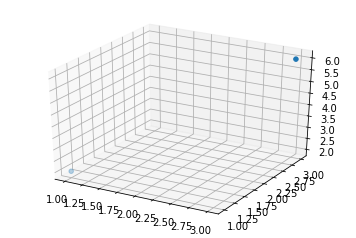

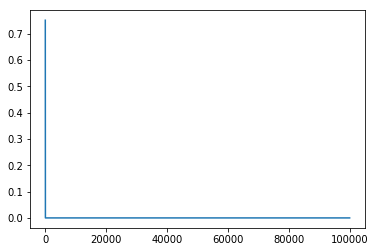



[0.8092847 1.1907153]
The value of R2 or the PCC squared for your data is 1.0

Note that R2 is not always a good measure of your models performance.
R-squared cannot determine whether the coefficient estimates andpredictions are biased, which is why you must assess the residual plots.


You have a perfect model :) ...Ensure that it is not overfitting though.

The adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases only if the new term improves the model more than would be expected by chance.It decreases when a predictor improves the model by less than expected by chance.

The value of adjusted R2 is : 1.0


In [18]:
num_samples = int(input("How many samples do you have ? "))
Dim = int(input("How many features do you wish to consider ? :"))


Data = input("Enter the input values and expected output values in space seperated tuples.")
Data = [eval(i) for i in Data.split(' ')]
Loop = int(input('how many loops do you require ?: '))
lr = float(input("What would you like the learning rate to be: "))

if len(Data) != num_samples:
    print("You have provided incorrect number of samples")
X = np.array([list(i[0:Dim]) for i in Data])
y = np.array([i[-1] for i in Data])

if Dim == 2:
    fig = plt.figure()
    ax = fig.add_subplot(111,projection = '3d')
    ax.scatter(X[:,0],X[:,1],y)
    plt.show()
elif Dim == 1:
    plt.scatter(X,y)
    plt.xlabel('Input data points')
    plt.ylabel('Output data points')
    plt.title('Data points in space')
    plt.show()
else:
    print("The visualization is beyond human perception")
    

W = np.random.rand(Dim)
cost = []
for i in range(Loop):
    yhat = X.dot(W)
    delta = yhat - y
    W = W - lr*X.T.dot(delta)
    mse = delta.dot(delta)/num_samples
    cost.append(mse)
    
plt.plot(cost)
plt.show()

print()
print()
print(W)
    
d1 = y - yhat
d2 = y - y.mean()
R2 = 1 - (d1.dot(d1)/d2.dot(d2))

print('The value of R2 or the PCC squared for your data is {}'.format(R2))
print()
print("Note that R2 is not always a good measure of your models performance.")
print("R-squared cannot determine whether the coefficient estimates and\
predictions are biased, which is why you must assess the residual plots.")
print()
print()
if R2 == 1:
    print('You have a perfect model :) ...Ensure that it is not overfitting though.')
elif R2 > 0.70:
    print("That is a very good fit ")
elif R2 > 0.40 and R2<.70:
    print("Your model is decent." )
elif R2>0 and R2<0.4:
    print("Your model has poor performance" )
elif R2<0:
    print("Your model is very poor.")
    print("Even the wildest of guesses are statistically would be more significant.\
Here is what you could do:\n \
1.Try a different model altogether. \n \
2.Try using better features. \n  \
3.Try using polynomial Linear Regression ")

SS_Residual = sum((y-yhat)**2)
SS_Total = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)

print()
print("The adjusted R-squared is a modified version of R-squared that has been adjusted for \
the number of predictors in the model. The adjusted R-squared increases only if \
the new term improves the model more than would be expected by chance.\
It decreases when a predictor improves the model by less than expected by chance.")
print()
print("The value of adjusted R2 is : {}".format(adjusted_r_squared))